## Gaussian Process with Noise
In the previous notebook `Gaussian Process.ipynb`, we've looked at the basic concept of Gaussian process regression. Recall that for training set $X$ with size $N$ of inputs $\boldsymbol{\mathrm{x}}_i$, and test set $X_*$ with size $N_*$ of inputs $\boldsymbol{\mathrm{x}}^*_i$ (their function values denoted $\boldsymbol{f}_{X}$ and $\boldsymbol{f}_{*}$)    
    
$$\text{If} \begin{bmatrix}
\boldsymbol{f}_{X} \\
\boldsymbol{f}_{*}
\end{bmatrix} \sim \mathcal{N} \left(\begin{bmatrix}
\boldsymbol \mu_{X} \\
\boldsymbol \mu_{X_*}
\end{bmatrix}, \begin{bmatrix}
\boldsymbol{\mathrm{K}}_{X,X} & \boldsymbol{\mathrm{K}}_{X,*} \\
\boldsymbol{\mathrm{K}}_{X,*}^\mathrm{T} & \boldsymbol{\mathrm{K}}_{*,*} \\
\end{bmatrix} \right),$$     
where $\boldsymbol \mu_{X} = \left[ m(\boldsymbol{\mathrm{x}}_1),...,m(\boldsymbol{\mathrm{x}}_{N}) \right]$, $\boldsymbol \mu_{X_*} = \left[ m(\boldsymbol{\mathrm{x}}^*_1),...,m(\boldsymbol{\mathrm{x}}^*_{N_*}) \right]$, 
$\boldsymbol{\mathrm{K}}_{X,X} = \begin{bmatrix}
\mathcal{K}(\boldsymbol{\mathrm{x}}_1, \boldsymbol{\mathrm{x}}_1) & ... & \mathcal{K}(\boldsymbol{\mathrm{x}}_1, \boldsymbol{\mathrm{x}}_N) \\
 & \vdots & \\
\mathcal{K}(\boldsymbol{\mathrm{x}}_N, \boldsymbol{\mathrm{x}}_1) & ... & \mathcal{K}(\boldsymbol{\mathrm{x}}_N, \boldsymbol{\mathrm{x}}_N)
\end{bmatrix}$, 
$\boldsymbol{\mathrm{K}}_{X,*} = \begin{bmatrix}
\mathcal{K}(\boldsymbol{\mathrm{x}}_1, \boldsymbol{\mathrm{x}}^*_1) & ... & \mathcal{K}(\boldsymbol{\mathrm{x}}_1, \boldsymbol{\mathrm{x}}^*_{N_*}) \\
 & \vdots & \\
\mathcal{K}(\boldsymbol{\mathrm{x}}_N, \boldsymbol{\mathrm{x}}^*_1) & ... & \mathcal{K}(\boldsymbol{\mathrm{x}}_N, \boldsymbol{\mathrm{x}}^*_{N_*})
\end{bmatrix}$, 
$\boldsymbol{\mathrm{K}}_{*,*} = \begin{bmatrix}
\mathcal{K}(\boldsymbol{\mathrm{x}}^*_1, \boldsymbol{\mathrm{x}}^*_1) & ... & \mathcal{K}(\boldsymbol{\mathrm{x}}^*_1, \boldsymbol{\mathrm{x}}^*_{N_*}) \\
 & \vdots & \\
\mathcal{K}(\boldsymbol{\mathrm{x}}^*_{N_*}, \boldsymbol{\mathrm{x}}^*_1) & ... & \mathcal{K}(\boldsymbol{\mathrm{x}}^*_{N_*}, \boldsymbol{\mathrm{x}}^*_{N_*})
\end{bmatrix}$      
$$\text {then } P(\boldsymbol{f}_{*} | X_* , X, \boldsymbol{f}_{X}) = \mathcal{N}(\boldsymbol{\mathrm{\mu}}_*, \boldsymbol{\mathrm{\Sigma}}_*),\\
\text{where } \boldsymbol{\mathrm{\mu}}_* = \boldsymbol \mu_{X_*} + \boldsymbol{\mathrm{K}}^\mathrm{T}_{X,*} \boldsymbol{\mathrm{K}}^{-1}_{X,X} \left( \boldsymbol{f}_{X}-\boldsymbol \mu_{X} \right)\\
\boldsymbol{\mathrm{\Sigma}}_* = \boldsymbol{\mathrm{K}}_{*,*} - \boldsymbol{\mathrm{K}}^\mathrm{T}_{X,*} \boldsymbol{\mathrm{K}}^{-1}_{X,X}\boldsymbol{\mathrm{K}}_{X,*}  $$        
     
This kind of Gaussian Processes assume that the observations have no noise, i.e. the function values of the target function at $X$ are exactly $\boldsymbol{f}_{X}$. We see that with this asumption, the mean function a GP gives always passes through the observations $(\boldsymbol{\mathrm{x}}_i, {\boldsymbol{f}_{X}}_i)$ This is problematic if there is noise in the observations, since, in that case, we don't want the GP to give corrupted outputs.     
       
When dealing with noisy data, the problem of fitting a GP becomes fitting to these y values:       
$$y_i = f(\boldsymbol{\mathrm{x}}_i) + \epsilon_i$$    
    
where $\epsilon_i \sim \mathcal{N}(0, \sigma^2)$. Since the noise $\epsilon$ is zero-mean, the kernel matrix $\boldsymbol{\mathrm{K}}_{X, X}$ should instead be $\begin{bmatrix}
\mathcal{K}(\boldsymbol{\mathrm{x}}_1, \boldsymbol{\mathrm{x}}_1) & ... & \mathcal{K}(\boldsymbol{\mathrm{x}}_1, \boldsymbol{\mathrm{x}}_N) \\
 & \vdots & \\
\mathcal{K}(\boldsymbol{\mathrm{x}}_N, \boldsymbol{\mathrm{x}}_1) & ... & \mathcal{K}(\boldsymbol{\mathrm{x}}_N, \boldsymbol{\mathrm{x}}_N)
\end{bmatrix} + \sigma^2 \boldsymbol{\mathrm{I}}$, and thus for a test point $\boldsymbol{\mathrm{x}}_*$, $y_*|X \sim \mathcal{N}(\boldsymbol{\mathrm{\mu}}_*, \boldsymbol{\mathrm{\Sigma}})_*$, where     
$$\boldsymbol{\mathrm{\mu}}_* = \boldsymbol{\mathrm{\mu}}_{X_*} + \boldsymbol{\mathrm{K}}_{X, *}^\mathrm{T}(\boldsymbol{\mathrm{K}}_{X, X} + \sigma^2 \boldsymbol{\mathrm{I}})^{-1} (\boldsymbol{f}_X - \boldsymbol{\mathrm{\mu}}_X)\\
\boldsymbol{\mathrm{\Sigma}}_* = \boldsymbol{\mathrm{K}}_{*,*} - \boldsymbol{\mathrm{K}}^\mathrm{T}_{X,*} (\boldsymbol{\mathrm{K}}_{X,X} + \sigma^2 \boldsymbol{\mathrm{I}})^{-1}\boldsymbol{\mathrm{K}}_{X,*}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [24]:
class GaussianProcess:
    def __init__(self, input_dim, kernel, mean_function=lambda x: np.zeros(x.shape[0]), noise_var=0):
        self.kernel = kernel
        self.dim = input_dim
        self.mean_function = mean_function
        self.noise_var = noise_var
        self.mean = None
        self.cov = None
        self.X = None
        self.Y = None
        
        try:
            kernel(np.array([[1,1], [2,2]]), np.array([[2,2], [1,1]]))
        except:
            raise RuntimeError("Invalid Mercer kernel")
        try:
            kernel(np.array([[1,1], [2,2]]), np.array([[2,2], [1,1]]))
        except:
            raise RuntimeError("Invalid mean function")
    
    
    def fit(self, X, Y):
        self.X, self.Y = X, Y
        self.cov = []
        for i in range(X.shape[0]):
            x1 = np.repeat(np.expand_dims(X[i], axis=0), X.shape[0], axis=0)
            self.cov.append(self.kernel(x1, X))
        self.cov = np.array(self.cov) + np.identity(len(self.cov)) * self.noise_var
        self.mean = self.mean_function(X)
        
    def predict(self, x):
        test_mean = self.mean_function(np.expand_dims(x, axis=0))
        x1 = np.repeat(np.expand_dims(x, axis=0), self.X.shape[0], axis=0)
        cov_train2test = self.kernel(x1, self.X)
        cov_test2test = self.kernel(x, x)
        
        predicted_mean = test_mean + np.dot(cov_train2test, np.matmul(np.linalg.inv(self.cov), (self.Y-self.mean)))
        predicted_var = cov_test2test - np.dot(cov_train2test, np.matmul(np.linalg.inv(self.cov), cov_train2test))
        return predicted_mean, predicted_var

In [52]:
rbf = lambda x1, x2, l: np.exp(-np.linalg.norm(x1-x2, axis=-1)**2 / (2*l**2))
kernel = lambda x1, x2: rbf(x1, x2, l=0.5)
model = GaussianProcess(1, kernel=kernel, noise_var=10, mean_function=lambda x: np.reshape(x, (-1)))

In [53]:
function2predict = lambda x: np.sin(np.cos(0.6*x**2) + 1.5*x)+3

train_data_res = 20
x_train = np.expand_dims(np.linspace(-6, 6, train_data_res), axis=1)
y_train = np.reshape(function2predict(x_train), -1) + np.random.normal(0, 0.01, train_data_res)

In [54]:
model.fit(x_train, y_train)

In [55]:
x_test = np.expand_dims(np.linspace(-6, 6, 100), axis=1)
y_test = []
y_var = []
for x in x_test:
    mean, var = model.predict(x)
    y_test.append(float(mean))
    y_var.append(float(var))

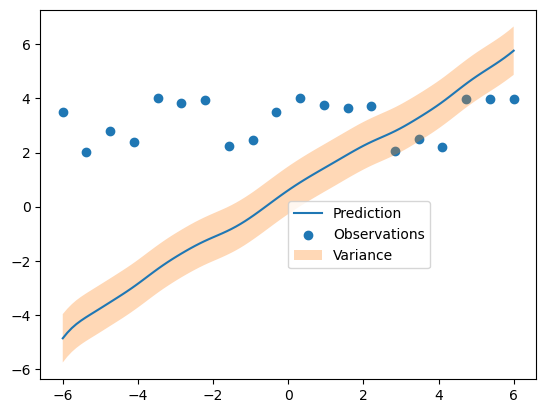

In [56]:
plt.plot(np.reshape(x_test, -1), y_test)
plt.scatter(np.reshape(x_train, -1), y_train)
plt.fill_between(np.reshape(x_test, -1), np.array(y_test)+np.array(y_var), np.array(y_test)-np.array(y_var), alpha=0.3)
# plt.plot(np.linspace(-3, 3, 100), function2predict(np.linspace(-3, 3, 100)), c='black')
# plt.ylim(-1.3, 1.3)
plt.legend(['Prediction', 'Observations', 'Variance', 'True function'], bbox_to_anchor =(0.80, 0.5), ncol = 1) 
plt.show()

## Two dimensional data

In [133]:
rbf = lambda x1, x2, l: np.exp(-np.linalg.norm(x1-x2, axis=-1)**2 / (2*l**2))
kernel = lambda x1, x2: rbf(x1, x2, l=0.5)
model = GaussianProcess(2, kernel=kernel, noise_var=1)

In [134]:
function2predict = lambda x, y: np.cos(np.sqrt((0.75*x)**2+0.3*(0.67*y)**2))
train_data_res = 10

x_train_x = np.linspace(-4, 4, train_data_res)
x_train_y = np.linspace(-4, 4, train_data_res)
x_train_x, x_train_y = np.meshgrid(x_train_x, x_train_y)
z = function2predict(x_train_x, x_train_y) + np.random.normal(0, 0.1, (train_data_res, train_data_res))

x_train = []
for i in range(x_train_x.shape[0]):
    x_train.append([[x_train_x[i][j], x_train_y[i][j]] for j in range(x_train_x.shape[1])])
x_train = np.reshape(x_train, (-1, 2))
y_train = np.reshape(z, -1)

In [135]:
model.fit(x_train, y_train)

In [136]:
x_test_x = np.linspace(-3, 3, 100)
x_test_y = np.linspace(-3, 3, 100)
x_test_x, x_test_y = np.meshgrid(x_test_x, x_test_y)

x_test = []
for i in range(x_test_x.shape[0]):
    x_test.append([[x_test_x[i][j], x_test_y[i][j]] for j in range(x_test_x.shape[1])])
x_test = np.reshape(x_test, (-1, 2))

In [137]:
y_predict = []
for x in x_test:
    mean, var = model.predict(x)
    y_predict.append(float(mean))
y_predict = np.reshape(y_predict, (100, 100))

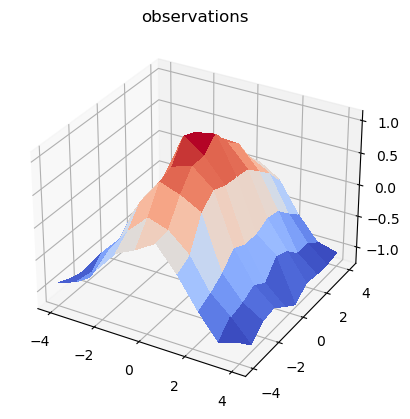

In [138]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(x_train_x, x_train_y, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.title("observations")

plt.show()

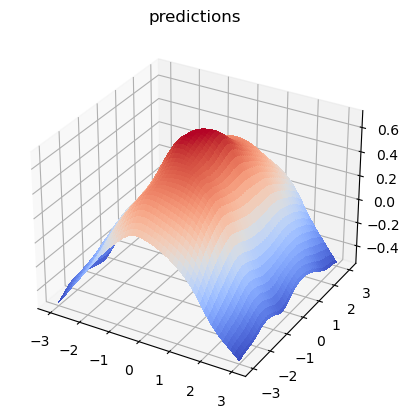

In [139]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(x_test_x, x_test_y, y_predict, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.title("predictions")

plt.show()

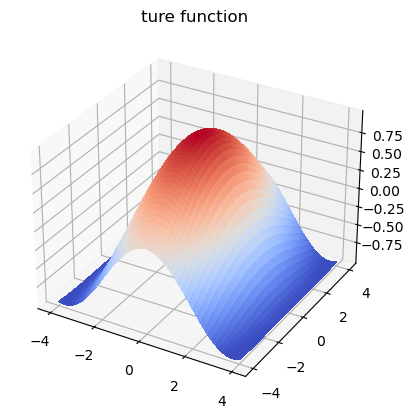

In [140]:
x = np.linspace(-4, 4, 100)
y = np.linspace(-4, 4, 100)
x, y = np.meshgrid(x, y)
z_true = function2predict(x, y)


fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(x, y, z_true, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.title("ture function")

plt.show()

In [5]:
kernel(np.array([0]), np.array([0]))

1.0